## **Assingment 4** - Group 50

Lütfi Altin (lutfia@kth.se) |
Jakob Heyder (heyder@kth.se)

### Task:

You are to study, implement and to test the spectral graph clustering algorithm as described in the paper “On Spectral Clustering: Analysis and an algorithm” (Links to an external site.) by Andrew Y. Ng, Michael I. Jordan, Yair Weiss. Using your implementation of the K-eigenvector algorithm, you are to analyse two sample graphs.

### Dataset and Tools

The classes will be implemented as Python functions.


In [0]:
# load dependencies (pandas, csv etc.)
import csv
import numpy as np
import scipy
import scipy.linalg
import re
import hashlib
import itertools
from collections import Counter
from pprint import pprint
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
import networkx
from sklearn.cluster import KMeans

[0 0 0 0 0 3 3 3 3 3 2 2 2 2 2 1 1 1 1 1]


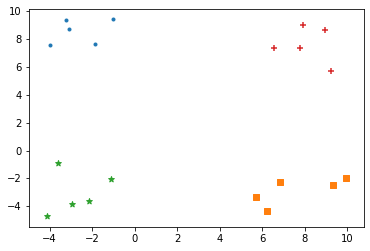

In [0]:
def sqMagnitude(v):
    # returns square magnitude of a vector
    return v.dot(v)

def affinity(S, sigma):
    # variable convention used here is same as variable convention in the paper
    # S - set of points, each point is a vector
    # sigma - square root of the scaling parameter
    # n - number of points in S
    # A - affinity matrix
    n = len(S)

    # 1. form the affinity matrix
    A = np.zeros((n, n)) # create n*n matrix filled with zeros
    for i in range(n):
        for j in range(n):
            if i != j:
                A[i, j] = np.exp(-sqMagnitude(S[i] - S[j]) / (2*sigma*sigma))
    return A

def cluster(A, k, plotKmeans=False):
    # variable convention used here is same as variable convention in the paper
    # A - affinity matrix
    # k - number of largest eigenvectors to be kept
    # n - number of points in S
    # D - diagonal matrix defined in 2nd step of the algorithm in the paper
    # L - matrix defined in 2nd step of the algorithm
    # X - matrix containing k largest eigenvectors of L. matrix Y is not created
    #     but values of X normalized in place
    n = len(A)

    # 2. construct D and L
    D = np.zeros((n, n))
    for i in range(n):
        D[i, i] = sum(A[i, :])

    D_inv_sqr = scipy.linalg.inv(scipy.linalg.sqrtm(D))
    L = D_inv_sqr @ A @ D_inv_sqr

    # 3. find k largest eigenvectors
    eigD, eigV = np.linalg.eigh(L) # eigD => eigen values, eigV => eigenvectors

    # find indices that would make eigenvalues sorted,
    # it is used for finding largest eigenvectors
    indicesSorted = list(reversed(np.argsort(eigD)))

    X = eigV[:, indicesSorted[:k]]
    
    # 4. normalize rows of X
    for i in range(n):
        sqm = sqMagnitude(X[i,:])
        if sqm > 0:
            X[i,:] = X[i,:] / np.sqrt(sqm)

    # 5. k-means cluster and return labels
    labels = KMeans(n_clusters=k, init='random').fit(X).labels_

    if plotKmeans:
        plt.scatter([X[i,0] for i in range(n)],
                    [X[i,1] for i in range(n)],
                    c=labels)
        plt.show()

    return labels

def plotPoints(points, clusters):
    # plot points and the cluster they belong to. works only with 2d points
    n = max(clusters) + 1

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
    colors = np.tile(colors, math.ceil(n/len(colors)))

    markers = ['.', 's', '*', '+']
    markers = np.tile(markers, math.ceil(n/len(markers)))

    for i in range(len(points)):
        plt.scatter(points[i][0], points[i][1],
                    c=colors[clusters[i]], marker=markers[clusters[i]])

    plt.show()    


# test clustering algorithm
# generate random points scattered around base points
basepoints = [np.array([-5, 5]),
              np.array([5, 5]),
              np.array([-5, -5]),
              np.array([5, -5])]

points = []
for p in basepoints:
    # for each base point, generate 5 random points around base
    for j in range(5):
        points.append(p + np.array([5*random.random(), 5*random.random()]))

clusters = cluster(affinity(points, 0.5), 4)
print(clusters)

plotPoints(points, clusters)


adjacency matrix:
[[0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]

example graph visualization


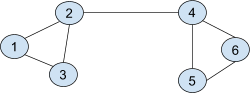

results:


array([1, 1, 1, 0, 0, 0], dtype=int32)

In [0]:
# for the case of graph dataset, adjacency matrix is defined instead of affinity

def adjacency(edges):
    n = np.max(np.max(edges))
    A = np.zeros((n, n))
    for e in edges:
        A[e[0]-1, e[1]-1] = 1.0
        A[e[1]-1, e[0]-1] = 1.0
    return A

# run example in assignment
graph = np.array([[1, 2],
                  [1, 3],
                  [2, 1],
                  [2, 3],
                  [2, 4],
                  [3, 1],
                  [3, 2],
                  [4, 2],
                  [4, 5],
                  [4, 6],
                  [5, 4],
                  [5, 6],
                  [6, 4],
                  [6, 5]])

A = adjacency(graph)
print('adjacency matrix:')
print(A)

print()
print('example graph visualization')
from IPython.display import Image, display
display(Image('Image_005.png'))

print('results:')
cluster(A, 2)

Graph data visualization


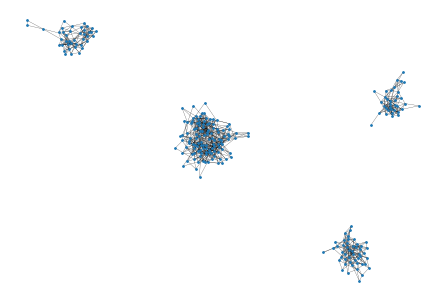

Graph data clustered


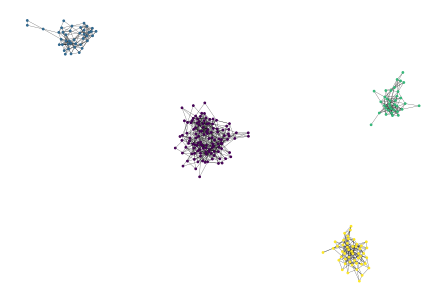

In [0]:
print('Graph data visualization')
G = networkx.read_edgelist(path="example1.dat", delimiter=",")
networkx.draw(G, networkx.spring_layout(G, seed=0), with_labels=False, node_size=3, width=0.2)
plt.show()


edges = []
with open('example1.dat', 'r') as f:
    for line in f:
        edges.append( [int(v.strip()) for v in line.split(',')] )
edges = np.array(edges)
clusters = cluster(adjacency(edges), 4)

print('Graph data clustered')
networkx.draw(G, networkx.spring_layout(G, seed=0), with_labels=False, node_size=3, width=0.2, node_color=clusters)
plt.show()

Graph data visualization


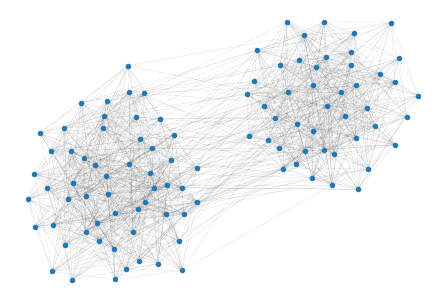

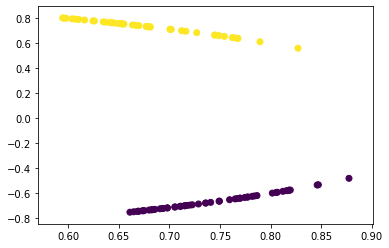

Graph data clustered


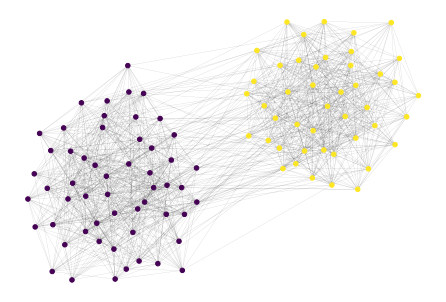

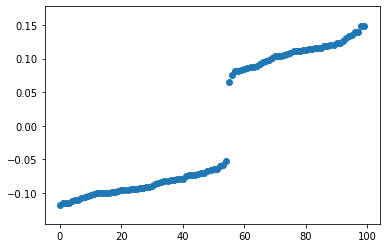

In [0]:
print('Graph data visualization')
G = networkx.read_edgelist(path="example2.dat", nodetype=int, delimiter=",", data=(('weight',float),))
networkx.draw(G, networkx.spring_layout(G, seed=0), with_labels=False, node_size=20, width=0.05)
plt.show()

edges = []
with open('example2.dat', 'r') as f:
    for line in f:
        edges.append( [int(v.strip()) for v in line.split(',')][0:2] )
edges = np.array(edges)
clusters = cluster(adjacency(edges), 2, plotKmeans=True)

print('Graph data clustered')
networkx.draw(G, networkx.spring_layout(G, seed=0), with_labels=False, node_size=20, width=0.05, node_color=clusters[[i-1 for i in G.nodes()]])
plt.show()

fiedler = networkx.linalg.fiedler_vector(G)
plt.scatter(range(len(fiedler)), sorted(fiedler))
plt.show()
